In [14]:
#importing required libraries
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)
    
def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))
  
def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)
    
def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

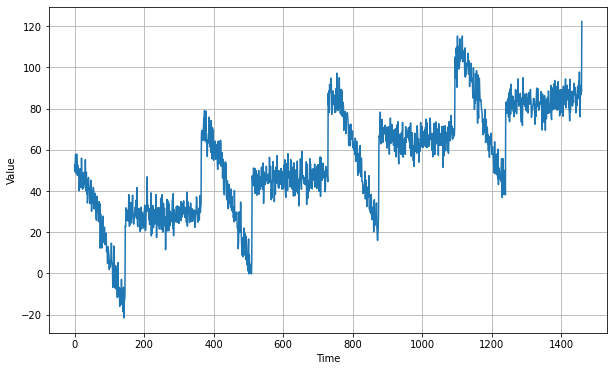

In [16]:
#time and seasonality
time = np.arange(4 * 365 + 1)

slope = 0.05
baseline = 10
amplitude = 40
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

noise_level=5
noise = white_noise(time, noise_level=noise_level, seed = 42)

series += noise

plt.figure(figsize=(10,6))
plot_series(time, series)
plt.show()

In [17]:
#splitting the dataset into the training period and validation period
#(in many cases we would also be having to split the data into test period also)

split_time=1000

time_train=time[:split_time]
x_train=series[:split_time]
time_validate=time[split_time:]
x_validate=series[split_time:]



In [18]:
# Naive forecasting

naive_forecast = series[split_time - 1 :-1] #just shifting the data by one 
# that is we are just copying the data of the previous day to the current day

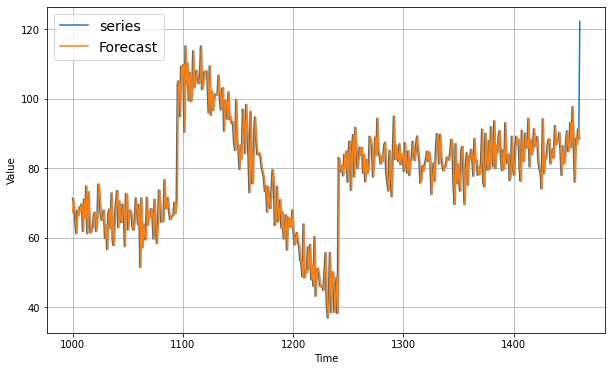

In [20]:
plt.figure(figsize=(10,6))
plot_series(time_validate, x_validate, label="series")
plot_series(time_validate, naive_forecast, label="Forecast")

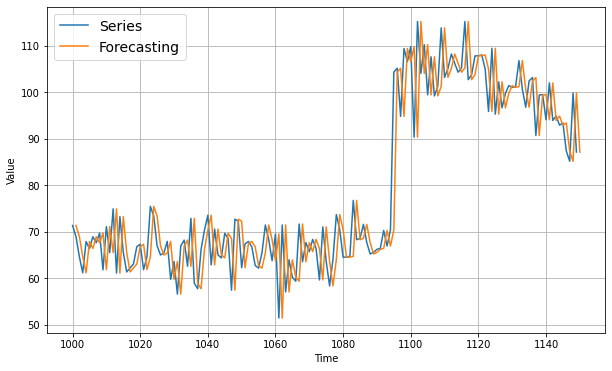

In [23]:
#zooming in to see the graph for a particular timeline for better understanding
plt.figure(figsize=(10,6))
plot_series(time_validate, x_validate, start=0, end=150, label="Series")
plot_series(time_validate, naive_forecast, start=1, end=151, label="Forecasting")

#we can see that data is exactly the same as for the previous day and current day

In [24]:
#computing mean absolute error between forecast and prediction
errors = naive_forecast - x_validate
abs_error = np.abs(errors)
mae = abs_error.mean()
mae

#this becomes our baseline and we will be improving our model accordingly to 
#improve this baseline

5.9379085153216735